In [110]:
# computation
import numpy as np

# dataframes and realted operations
import pandas as pd

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.preprocessing import MinMaxScaler

# modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree

# evaluation
from sklearn.metrics import mean_squared_log_error
from scipy.stats import pearsonr

# for progress bars
from tqdm import tqdm

## 1. Importing and looking at the data

In [2]:
train_data = pd.read_csv('train/train.csv')
fulfilment_center_info = pd.read_csv('train/fulfilment_center_info.csv')
meal_info = pd.read_csv('train/meal_info.csv')
test_data = pd.read_csv('test_QoiMO9B.csv.xls')

In [3]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [5]:
train_data.shape

(456548, 9)

In [6]:
train_data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

In [7]:
# No null values present in train_data

### Looking at the test data

In [8]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


### Looking at the fulfilment_center_info df 

In [10]:
fulfilment_center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [11]:
fulfilment_center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [12]:
# No null values present in this df

### Looking at the meal_info df

In [13]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [14]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [15]:
# No null values present in this df either

### 1.1 Merging the train and test seperately with (fulfilment_center_info + meal_info) dataframes

* checking if all values in the "center_id" column in train_data and test_data contains all the values of the "center_id" column in fulfilment_center_info

In [16]:
print(all(item in train_data['center_id'] for item in fulfilment_center_info['center_id']))
print(all(item in test_data['center_id'] for item in fulfilment_center_info['center_id']))

True
True


* we'll also need to merge this new table with the meal_info table, so checking again

In [17]:
# checking if all the meal_id values in the meal_info table are present in our main tables
print(all(item in train_data['meal_id'] for item in meal_info['meal_id']))
print(all(item in test_data['meal_id'] for item in meal_info['meal_id']))

True
True


> Now we know that merging these dataframes won't have any consequences like loss of data in the fulfilment or meal dataframes/tables. 

In [18]:
# shapes before merging

print(train_data.shape)
print(test_data.shape)

(456548, 9)
(32573, 8)


In [19]:
# merging both train and test dataframes seperately with fulfilment_center_info dataframe

train_data = train_data.merge(fulfilment_center_info, on = 'center_id')
test_data = test_data.merge(fulfilment_center_info, on = 'center_id')

In [20]:
# sanity check for merging operation

print(train_data.shape)
print(test_data.shape)

(456548, 13)
(32573, 12)


In [21]:
# merging both train and test dataframes seperately with meal_info dataframe

train_data = train_data.merge(meal_info, on = 'meal_id')
test_data = test_data.merge(meal_info, on = 'meal_id')

In [22]:
# shapes before merging

print(train_data.shape)
print(test_data.shape)

(456548, 15)
(32573, 14)


In [23]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [24]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
 8   city_code              32573 non-null  int64  
 9   region_code            32573 non-null  int64  
 10  center_type            32573 non-null  object 
 11  op_area                32573 non-null  float64
 12  category               32573 non-null  object 
 13  cuisine                32573 non-null  object 
dtypes: float64(3), int64(8), object(3)
memory usage: 3.7+ 

## 2. EDA

In [25]:
# CHECKING IF THE ANY NEW CENTERS WERE ADDED IN THE TEST DATA AS IT BELONGS TO AFTER WEEK 145
centers_in_train_data = train_data.center_id.unique()
centers_in_test_data = test_data.center_id.unique()
print("Centers in train = ", len(centers_in_train_data), "\nCenters in test = ",len(centers_in_test_data))
print("*"*50)
print("\nTest contains the same centers as train data: ", all(item in train_data['center_id'] for item in test_data['center_id']))

Centers in train =  77 
Centers in test =  77
**************************************************

Test contains the same centers as train data:  True


In [26]:
# CHECKING IF THE ANY NEW MEALS WERE ADDED IN THE TEST DATA AS IT BELONGS TO AFTER WEEK 145
meals_in_train_data = train_data.meal_id.unique()
meals_in_test_data = test_data.meal_id.unique()
print("Meals in train = ", len(meals_in_train_data), "\nMeals in test = ",len(meals_in_test_data))
print("*"*50)
print("\nTest contains the same meals as train data: ", all(item in train_data['meal_id'] for item in test_data['meal_id']))

Meals in train =  51 
Meals in test =  51
**************************************************

Test contains the same meals as train data:  True


### 2.1 Univariate analysis: center_id 

In [27]:
# weeks_count = dict(train_data.week.value_counts())
# weeks_count = dict(sorted(weeks_count.items()))
# weeks_count

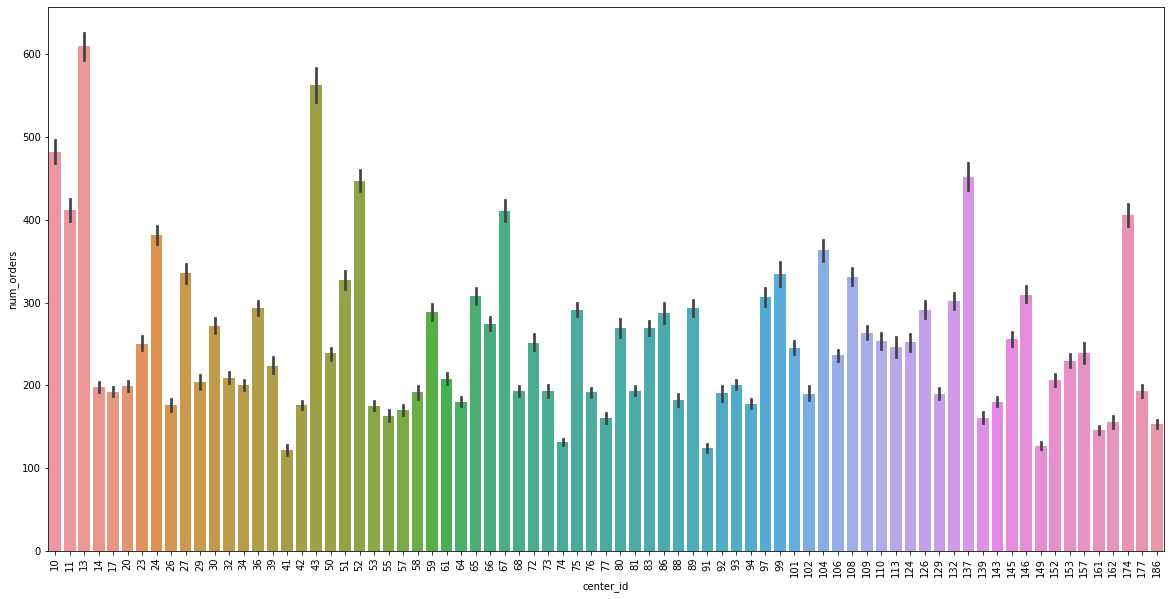

In [28]:
# PLOTTING CENTER_ID VS NUM_ORDERS

plt.figure(figsize = (20,10))
sns.barplot(train_data['center_id'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

> Observation: The center with center_id = 13 is associated with the maximum number of orders

### 2.2 Univariate analysis: meal_id 

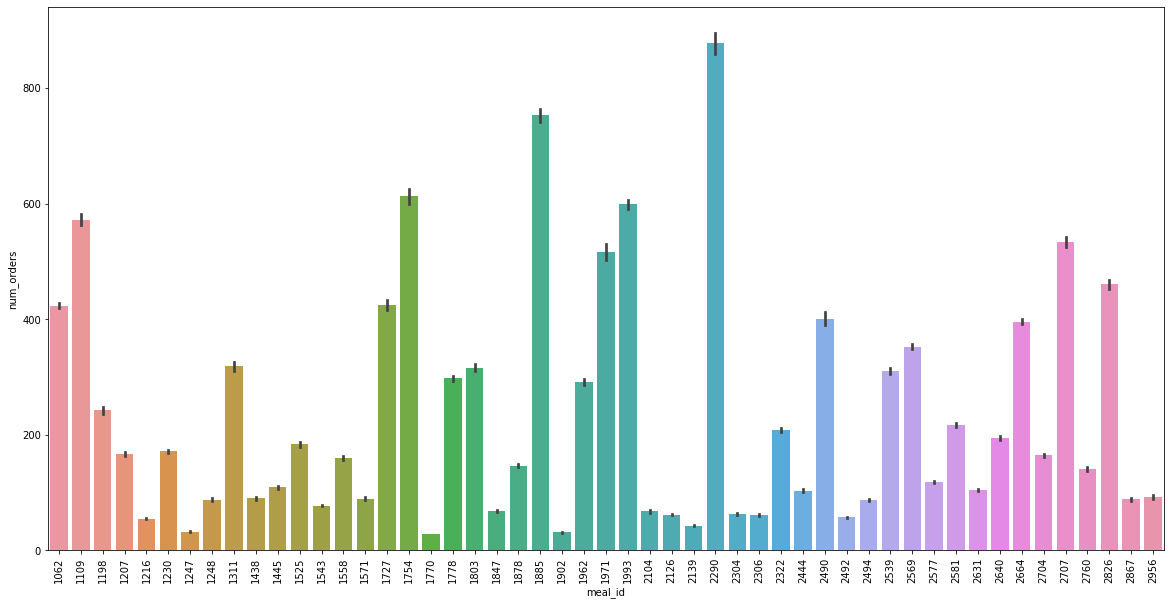

In [29]:
# PLOTTING MEAL_ID VS NUM_ORDERS

plt.figure(figsize = (20,10))
sns.barplot(train_data['meal_id'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

> Observation: The meal with meal_id = 2290 is associated with the maximum number of orders

### 2.3 Analysis: checkout_price, base_price

In [30]:
train_data[['checkout_price', 'base_price']]

,checkout_price,base_price
0,136.83,152.29
1,135.83,152.29
2,132.92,133.92
3,135.86,134.86
4,146.50,147.50
...,...,...
456543,583.03,630.53
456544,581.03,582.03
456545,583.03,581.03
456546,582.03,581.03


#### > Checkout price can be the final price after some operations on base_price like-
* Deduction of discount
* Addition of delivery charges
* etc

> So we'll have to check if base_price and checkout_price are related in some way

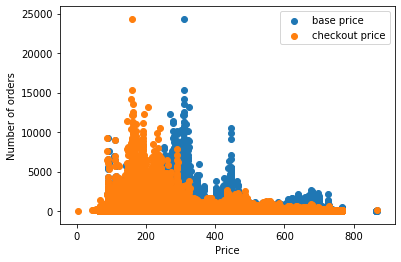

In [31]:
# PLOTTING BOTH THE VARIABLES AGAINST THE TARGET VARIABLE

plt.scatter(train_data['base_price'], train_data['num_orders'], label = 'base price')
plt.scatter(train_data['checkout_price'], train_data['num_orders'], label = 'checkout price')
plt.legend()
plt.ylabel("Number of orders")
plt.xlabel("Price")
plt.show()

> Observations: 
* Both the variables seem to have outliers at the same price values.
* The variance of both the variables seems to be almost same.
* Apart from this, nothing can be said about the relationship between them at the moment.

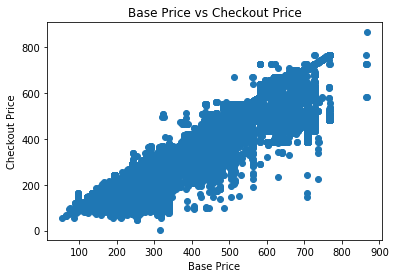

In [32]:
# PLOTTING A SCATTER PLOT OF BOTH THE VARIABLES TO SEE IF SOME REALTIONSHIP CAN BE FOUND

plt.scatter(train_data['base_price'], train_data['checkout_price'])
plt.title("Base Price vs Checkout Price")
plt.xlabel("Base Price")
plt.ylabel("Checkout Price")
plt.show()

> Observations: 
* So the relationship is almost linear with some outliers.
* This implies that we can try out teh following methods to check for correlation -
    * Pearson's correlation coeffecient (assumes a linear relationship) 
    * Spearman's rank correlation coeffecient (isn't biased to linear relationships and is robust to outliers).

In [33]:
# https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

corr, _ = pearsonr(train_data['base_price'], train_data['checkout_price'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.953


* It;s clear that these two featuers/variables are highly correlated. So, I'll be rermoving the base price from the model.

In [34]:
# REMOVING BASE PRICE FROM THE MODEL

print("Shapes before dropping- ")
print(train_data.shape)
print(test_data.shape)
train_data = train_data.drop(columns = 'base_price')
test_data = test_data.drop(columns = 'base_price')

print("Shapes after dropping- ")
print(train_data.shape)
print(test_data.shape)

Shapes before dropping- 
(456548, 15)
(32573, 14)
Shapes after dropping- 
(456548, 14)
(32573, 13)


In [35]:
# finding correlations for all the column pairs

train_data.corr(method ='pearson')

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
id,1.000000,0.002225,0.002641,0.000488,0.001941,0.002001,0.003111,0.000702,-0.000387,-0.000648,-0.000090
week,0.002225,1.000000,-0.003450,0.019814,0.026581,-0.000841,-0.008263,-0.017210,0.000405,0.004600,0.001550
center_id,0.002641,-0.003450,1.000000,0.009893,0.001348,0.013658,-0.005043,-0.053035,0.061078,-0.003426,-0.111869
meal_id,0.000488,0.019814,0.009893,1.000000,0.010748,0.013402,0.016354,0.010597,-0.003198,-0.001662,-0.001546
checkout_price,0.001941,0.026581,0.001348,0.010748,1.000000,0.004818,-0.057184,-0.282108,-0.004805,-0.003648,0.021569
emailer_for_promotion,0.002001,-0.000841,0.013658,0.013402,0.004818,1.000000,0.390534,0.277147,-0.005234,-0.007462,-0.019462
homepage_featured,0.003111,-0.008263,-0.005043,0.016354,-0.057184,0.390534,1.000000,0.294490,0.008640,0.003605,0.041498
num_orders,0.000702,-0.017210,-0.053035,0.010597,-0.282108,0.277147,0.294490,1.000000,0.041596,0.029744,0.176976
city_code,-0.000387,0.000405,0.061078,-0.003198,-0.004805,-0.005234,0.008640,0.041596,1.000000,0.042686,0.131476
region_code,-0.000648,0.004600,-0.003426,-0.001662,-0.003648,-0.007462,0.003605,0.029744,0.042686,1.000000,0.023327


In [36]:
# no other columns seem to be correlated

### 2.4 Univariate analysis: center_type 

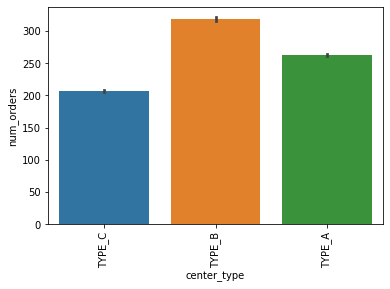

In [37]:
# PLOTTING CENTER_TYPE VS NUM_ORDERS

#plt.figure(figsize = (20,10))
sns.barplot(train_data['center_type'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

### 2.5 Univariate analysis: category 

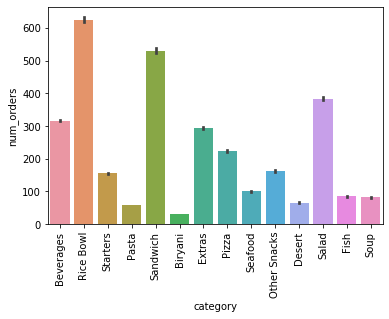

In [38]:
# PLOTTING CATEGORY VS NUM_ORDERS

#plt.figure(figsize = (20,10))
sns.barplot(train_data['category'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

### 2.6 Univariate analysis: cuisine

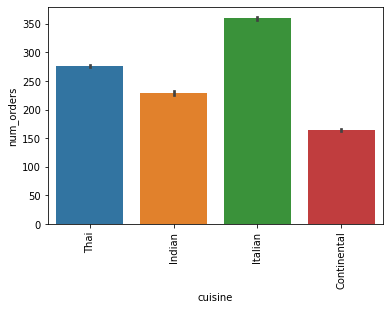

In [39]:
# PLOTTING CUISINE VS NUM_ORDERS

#plt.figure(figsize = (20,10))
sns.barplot(train_data['cuisine'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

### 2.7 Univariate analysis: op_area

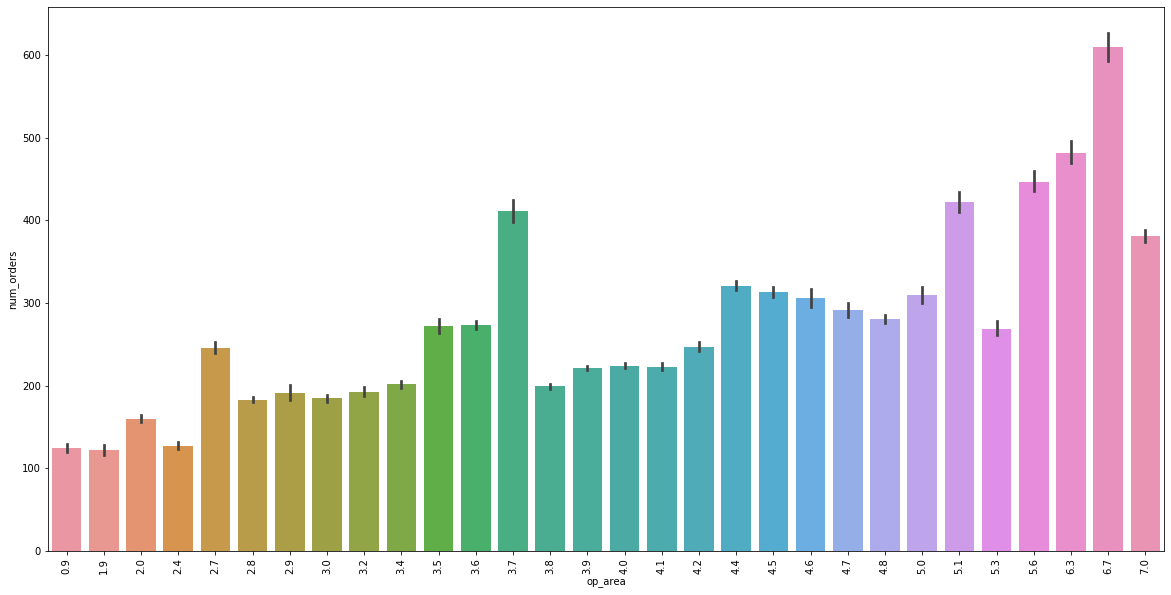

In [40]:
# PLOTTING OP_AREA VS NUM_ORDERS

plt.figure(figsize = (20,10))
sns.barplot(train_data['op_area'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

In [41]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


### 2.8 Univariate analysis: week

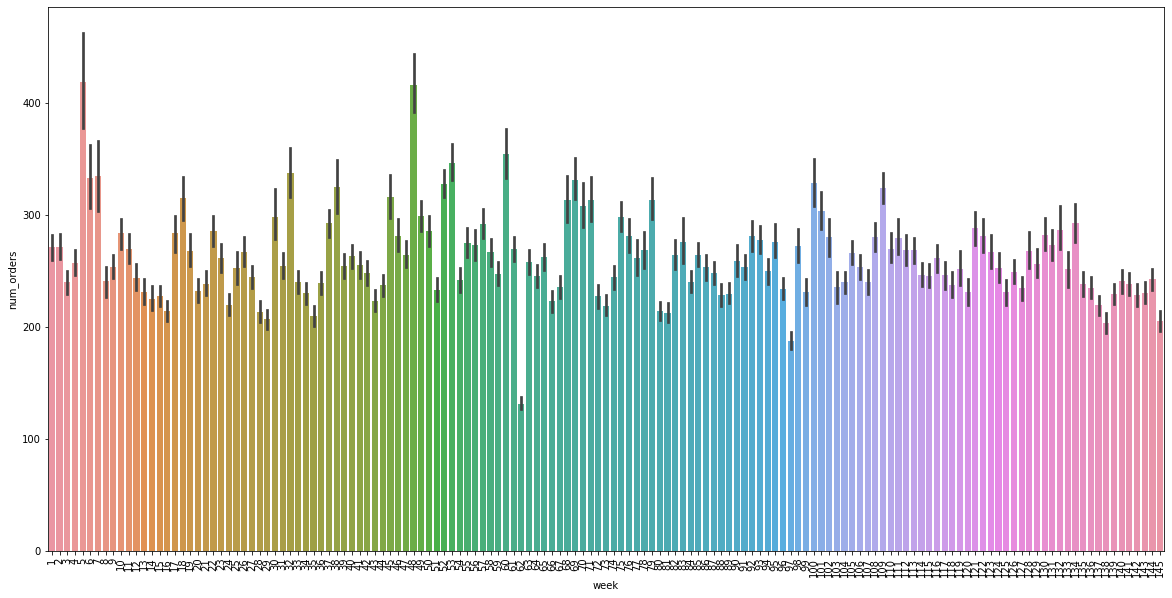

In [42]:
# PLOTTING WEEK VS NUM_ORDERS

plt.figure(figsize = (20,10))
sns.barplot(train_data['week'], train_data['num_orders'])
plt.xticks(rotation = 'vertical')
plt.show()

In [43]:
# plotting the week vs orders trend
# https://www.geeksforgeeks.org/pandas-groupby/
week_and_orders = train_data.groupby('week').agg({'num_orders': 'sum'})

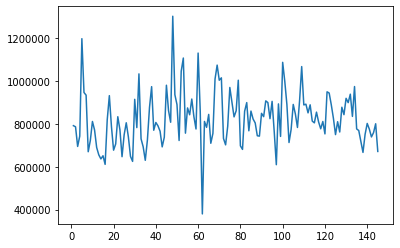

In [44]:
plt.plot(week_and_orders.index, week_and_orders.num_orders)
plt.show()

* This shows that there is periodicity (with a few outliers- can be some specific events)
* Also the overall trend is pretty much neither increasing, nor decreasing

##### > This can be a STATIONARY TIME SERIES 
(because mean and variance over the periods is roughly the same and there is no upwards or downwards trend)

> But the element of time can be incorporated just by not shuffling this data because we only have week number and no timestamps. 

In [45]:
train_data['week'].is_monotonic_increasing

False

In [46]:
# printing the first 5 occurences of week 1 data

train_data[train_data['week'] == 1].head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
145,1040403,1,24,1885,136.83,0,0,1498,614,85,TYPE_B,3.6,Beverages,Thai
265,1103215,1,11,1885,136.83,0,0,959,679,56,TYPE_A,3.7,Beverages,Thai
410,1034383,1,83,1885,121.31,0,1,1025,659,77,TYPE_A,5.3,Beverages,Thai
555,1118999,1,32,1885,114.52,0,1,445,526,34,TYPE_A,3.8,Beverages,Thai


In [47]:
# printing the firsst 5 occurences in the real dataset

train_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


* it's clear that the data for every week is shuffled in the dataset. The recordings seem to be sorted with respect to city_code and region_code values.

### Observations:
* The week numbers are not monotonically increasing.
* To make this dataset respect the ordering of week numbers, i.e. TIME, we'll have to sort it in some way

In [48]:
# sorting the dataframe based on "week"

train_data = train_data.sort_values('week')
train_data = train_data.reset_index(drop = True)
train_data

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1102584,1,11,1525,242.50,0,1,460,679,56,TYPE_A,3.7,Other Snacks,Thai
2,1026447,1,83,1525,244.50,0,0,94,659,77,TYPE_A,5.3,Other Snacks,Thai
3,1177435,1,32,1525,249.29,0,0,82,526,34,TYPE_A,3.8,Other Snacks,Thai
4,1108310,1,43,2539,133.86,0,0,675,590,56,TYPE_A,5.1,Beverages,Thai
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1126639,145,39,1247,446.23,0,0,14,526,34,TYPE_C,3.8,Biryani,Indian
456544,1476913,145,75,1558,548.08,0,0,175,651,77,TYPE_B,4.7,Pizza,Continental
456545,1193828,145,97,2290,272.60,0,0,473,628,77,TYPE_A,4.6,Rice Bowl,Indian
456546,1188974,145,27,2539,158.14,0,0,244,713,85,TYPE_A,4.5,Beverages,Thai


## 3. Preparing data for models

### 3.1 Handling categorical features which are not being treated as categorical in the dataset

In [49]:
categorical_columns_present_as_numericals = ['center_id', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'city_code', 'region_code']
categorical_columns_present_as_text = ['center_type', 'category', 'cuisine']

for column in categorical_columns_present_as_numericals:
    print(column, "contains:", train_data[column].nunique(), "unique values")
    print("-"*50)
for column in categorical_columns_present_as_text:
    print(column, "contains:", train_data[column].nunique(), "unique values")
    print("-"*50)

center_id contains: 77 unique values
--------------------------------------------------
meal_id contains: 51 unique values
--------------------------------------------------
emailer_for_promotion contains: 2 unique values
--------------------------------------------------
homepage_featured contains: 2 unique values
--------------------------------------------------
city_code contains: 51 unique values
--------------------------------------------------
region_code contains: 8 unique values
--------------------------------------------------
center_type contains: 3 unique values
--------------------------------------------------
category contains: 14 unique values
--------------------------------------------------
cuisine contains: 4 unique values
--------------------------------------------------


In [50]:
train_data.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [51]:
# some inherently catgorical colulmns should be categorical but are int64/float64 etc.
# using prepare_data_for_models method to convert these 

In [52]:
#train_data['category'].value_counts()

In [53]:
#train_data['cuisine'].value_counts()

In [54]:
# sorted(train_data['op_area'].unique())
# sorted(test_data['op_area'].unique())

In [55]:
#train_data['center_type'].value_counts()

In [56]:
#train_data['city_code'].value_counts()

In [57]:
#train_data['region_code'].value_counts()

In [58]:
categorical_columns_present_as_numericals

['center_id',
 'meal_id',
 'emailer_for_promotion',
 'homepage_featured',
 'city_code',
 'region_code']

In [59]:
categorical_columns_present_as_text

['center_type', 'category', 'cuisine']

In [60]:
# helper function for changing the inherently categorical columns to categories

def prepare_categorial_data_for_models(train_or_test_dataset: pd.DataFrame):
    
    # FOR NUMERICAL CATEGORIES
    for column in categorical_columns_present_as_numericals:
        train_or_test_dataset[column] = train_or_test_dataset[column].astype('category')
    
    # FOR TEXT CATEGORIES
    for column in categorical_columns_present_as_text:
        dummies_for_column = pd.get_dummies(train_or_test_dataset[column], prefix = column)
        train_or_test_dataset[dummies_for_column.columns.values] = dummies_for_column

In [61]:
prepare_categorial_data_for_models(train_data)
prepare_categorial_data_for_models(test_data)
train_data = train_data.drop(columns = categorical_columns_present_as_text)
test_data = test_data.drop(columns = categorical_columns_present_as_text)
print(train_data.shape)
print(test_data.shape)

(456548, 32)
(32573, 31)


In [62]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,55,1885,136.83,0,0,177,647,56,...,0,0,0,0,0,0,0,0,0,1
1,1102584,1,11,1525,242.50,0,1,460,679,56,...,0,0,0,0,0,0,0,0,0,1
2,1026447,1,83,1525,244.50,0,0,94,659,77,...,0,0,0,0,0,0,0,0,0,1
3,1177435,1,32,1525,249.29,0,0,82,526,34,...,0,0,0,0,0,0,0,0,0,1
4,1108310,1,43,2539,133.86,0,0,675,590,56,...,0,0,0,0,0,0,0,0,0,1


In [63]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,55,1885,158.11,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
1,1262649,147,55,1885,159.11,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
2,1453211,149,55,1885,157.14,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
3,1262599,150,55,1885,159.14,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
4,1495848,151,55,1885,160.11,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1


### 3.2 Normalizing the numerical features

* Checkout_price is a numerical feature. So it should be normalized.
* I'll fit a MinMaxScaler() on my train_data's values only and then transform test_data with this scaler, to avoid data leakage.

In [64]:
train_checkout_price = train_data['checkout_price'][:, np.newaxis]
test_checkout_price = test_data['checkout_price'][:, np.newaxis]

In [65]:
# fitting a min-max scaler object on train_data's checkout_price

scaler = MinMaxScaler().fit(train_checkout_price)

In [66]:
# normalizing the checkout_price feature in train data

train_data['checkout_price'] = scaler.transform(train_checkout_price)

# normalizing the checkout_price feature in test data

test_data['checkout_price'] = scaler.transform(test_checkout_price)

In [67]:
# sanity check

train_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1379560,1,55,1885,0.155056,0,0,177,647,56,...,0,0,0,0,0,0,0,0,0,1
1,1102584,1,11,1525,0.277459,0,1,460,679,56,...,0,0,0,0,0,0,0,0,0,1
2,1026447,1,83,1525,0.279775,0,0,94,659,77,...,0,0,0,0,0,0,0,0,0,1
3,1177435,1,32,1525,0.285324,0,0,82,526,34,...,0,0,0,0,0,0,0,0,0,1
4,1108310,1,43,2539,0.151616,0,0,675,590,56,...,0,0,0,0,0,0,0,0,0,1


In [68]:
# sanity check

test_data.head()

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1028232,146,55,1885,0.179706,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
1,1262649,147,55,1885,0.180864,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
2,1453211,149,55,1885,0.178582,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
3,1262599,150,55,1885,0.180899,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1
4,1495848,151,55,1885,0.182022,0,0,647,56,2.0,...,0,0,0,0,0,0,0,0,0,1


In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   id                     32573 non-null  int64   
 1   week                   32573 non-null  int64   
 2   center_id              32573 non-null  category
 3   meal_id                32573 non-null  category
 4   checkout_price         32573 non-null  float64 
 5   emailer_for_promotion  32573 non-null  category
 6   homepage_featured      32573 non-null  category
 7   city_code              32573 non-null  category
 8   region_code            32573 non-null  category
 9   op_area                32573 non-null  float64 
 10  center_type_TYPE_A     32573 non-null  uint8   
 11  center_type_TYPE_B     32573 non-null  uint8   
 12  center_type_TYPE_C     32573 non-null  uint8   
 13  category_Beverages     32573 non-null  uint8   
 14  category_Biryani       32573 non-null 

## 4. Splitting the data into Train, Validation and Test sets

In [70]:
print(train_data.shape)
print(test_data.shape)

(456548, 32)
(32573, 31)


In [71]:
target_variable = ['num_orders']
variables_to_ignore = ['id']

In [72]:
final_variables = [column for column in train_data.columns if column not in target_variable and column not in variables_to_ignore]

In [73]:
# Will be useful for train-test-validation splitting

number_of_rows_belonging_to_each_week = train_data['week'].value_counts()
number_of_rows_belonging_to_each_week

122    3359
105    3348
106    3347
140    3332
123    3331
       ... 
13     2838
12     2831
14     2830
7      2795
8      2786
Name: week, Length: 145, dtype: int64


* After sorting, our data almost resembles a timeseries in the way that the rows are ordered according to the week number, so we can use the last week (145th week) as our validation set to see how well the model performs.


In [74]:
# finding out how many rows belong to the final week in our training data

number_of_rows_belonging_to_each_week[145]

3268

In [75]:
# finding out where our validation set begins

train_data[train_data['week']==145]

,id,week,center_id,meal_id,checkout_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,...,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Continental,cuisine_Indian,cuisine_Italian,cuisine_Thai
453280,1292339,145,132,2707,0.269593,0,0,1000,522,56,...,0,0,0,0,0,0,0,0,1,0
453281,1244652,145,11,1207,0.433708,0,0,188,679,56,...,0,0,0,0,0,0,1,0,0,0
453282,1128068,145,27,2306,0.279775,1,0,135,713,85,...,0,0,0,0,0,0,0,0,1,0
453283,1446185,145,20,1727,0.537079,0,0,177,522,56,...,1,0,0,0,0,0,0,1,0,0
453284,1257862,145,27,2490,0.334831,0,0,69,713,85,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1126639,145,39,1247,0.513448,0,0,14,526,34,...,0,0,0,0,0,0,0,1,0,0
456544,1476913,145,75,1558,0.631426,0,0,175,651,77,...,0,0,0,0,0,0,1,0,0,0
456545,1193828,145,97,2290,0.312325,0,0,473,628,77,...,1,0,0,0,0,0,0,1,0,0
456546,1188974,145,27,2539,0.179741,0,0,244,713,85,...,0,0,0,0,0,0,0,0,0,1


In [101]:
# so, the data after (and including) the row number = 453280, belongs to our required validation set
# fetching it

X_train = train_data.iloc[0:453280, :]
X_valid = train_data.iloc[453280:, :]
X_test = test_data

In [102]:
print("-"*100)
print("Shapes before removing the target and id variables: ")
print("-"*100)
print("X_train:", X_train.shape)
print("X_valid:", X_valid.shape)
print("X_test:", X_test.shape)

print("-"*100)
print("Shapes after removing the target and id variables from train and valid: ")
print("-"*100)

# train 
y_train = X_train[target_variable]
X_train = X_train[final_variables]

# valid
y_valid = X_valid[target_variable]
X_valid = X_valid[final_variables]

#test
X_test = X_test[final_variables]

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_valid:", X_valid.shape)
print("y_valid", y_valid.shape)
print("X_test:", X_test.shape)

----------------------------------------------------------------------------------------------------
Shapes before removing the target and id variables: 
----------------------------------------------------------------------------------------------------
X_train: (453280, 32)
X_valid: (3268, 32)
X_test: (32573, 31)
----------------------------------------------------------------------------------------------------
Shapes after removing the target and id variables from train and valid: 
----------------------------------------------------------------------------------------------------
X_train: (453280, 30)
y_train: (453280, 1)
X_valid: (3268, 30)
y_valid (3268, 1)
X_test: (32573, 30)


### 4.1 Linear Regression model

In [128]:
def create_and_save_linear_regression_predictions():
    lr = LinearRegression().fit(X_train, y_train)
    print("Score on train data =", lr.score(X_train, y_train))
    y_pred = abs(lr.predict(X_test))
    # on train data
    msle = mean_squared_log_error(y_train, abs(lr.predict(X_train)))
    print("msle on train =", msle)

    # creating the output file
    submission_file_two = pd.DataFrame({'id': test_data['id'], 'num_orders': y_pred.ravel()})
    print("File is: ")
    print(submission_file_two.head())
    # saving the file
    submission_file_two.to_csv('submission_file_two.csv', index=False)

### 4.2 Decision Tree model (with TimeSeries incorporated)

In [106]:
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, y_train)

In [107]:
# on training data
msle_train = mean_squared_log_error(y_train, abs(clf.predict(X_train)))
# on validation data
msle_valid = mean_squared_log_error(y_valid, abs(clf.predict(X_valid)))

print("MSLE for train data:", msle_train)
print("MSLE for validation data:", msle_valid)

MSLE for train data: 0.0
MSLE for validation data: 0.4381189761744719


In [108]:
# so it's clear that our Decision tree is overfitting

In [109]:
# TODO -> WRITE A FUNCTION THAT RUNS THE DT REGRESSOR FOR DIFFERENT VALUES OF HYPERPARAMETERS (PRUNING)
# AND PLOT THE MSLE ACHIEVED IN EACH CASE FOR BOTH TRAIN AND VALIDATION SETS

In [136]:
def plot_the_validation_and_training_errors_for_different_depths():

    msle_train_values = []
    msle_valid_values = []
    for max_depth in tqdm(range(1, 16)):
        
        clf = tree.DecisionTreeRegressor(max_depth = max_depth).fit(X_train, y_train)
        
        # on training data
        msle_train = mean_squared_log_error(y_train, clf.predict(X_train))
        # on validation data
        msle_valid = mean_squared_log_error(y_valid, clf.predict(X_valid))

        msle_train_values.append(msle_train)
        msle_valid_values.append(msle_valid)
        
    # printing error lists
    print("Training errors:",msle_train_values)
    print("\nValidation errors:",msle_valid_values)
    # plotting
    plt.title("Training and Validation errors for different max_depths of Decision Tree")
    plt.grid()
    plt.plot(range(1, 16), msle_train_values, color = 'g', label = 'Training error')
    plt.plot(range(1, 16), msle_valid_values, color = 'r', label = 'Validation error')
    plt.legend()
    plt.xlabel("max_depth hyperparameter")
    plt.ylabel("MSLE")
    plt.show()

100%|██████████| 15/15 [00:33<00:00,  2.25s/it]

Training errors: [1.7465333954886528, 1.3693032555075904, 1.2218440014241354, 1.0518002295550757, 0.9203142051645031, 0.7615103483877755, 0.6930538072148159, 0.614482003805496, 0.5417091319756867, 0.4807843662988729, 0.4428120762903617, 0.4072370577635321, 0.37228687920493814, 0.3418964015304756, 0.3161673167514916]

Validation errors: [1.7569804513465404, 1.4258872293118747, 1.3075853782272335, 1.1190655988519855, 1.0167386132443363, 0.8219057100018569, 0.7826531429171826, 0.6609469952281267, 0.6132578356386924, 0.5561870203742914, 0.5085175235249878, 0.4689732127912412, 0.4452699853268169, 0.4242027693984165, 0.4134890227066048]


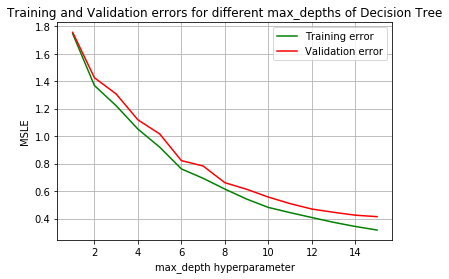

In [137]:
plot_the_validation_and_training_errors_for_different_depths()

In [127]:
# max_depth = 12 looks like a good point where both train and validation errors are comparable
# Let's go with this value as our final hyperparameter

In [152]:
def create_and_save_decision_tree_predictions():
    
    # fitting
    clf = tree.DecisionTreeRegressor(max_depth = 12).fit(X_train, y_train)
    print("Score on train data =", clf.score(X_train, y_train))
    
    # predicting
    y_pred = clf.predict(X_test)
    
    # error on training data
    msle_train = mean_squared_log_error(y_train, clf.predict(X_train))
    print("msle_train", msle_train)
    
    # error on validation data
    msle_valid = mean_squared_log_error(y_valid, clf.predict(X_valid))
    print("msle_valid", msle_valid)

    # creating the output file 
    submission_file_dt = pd.DataFrame({'id': test_data['id'], 'num_orders': y_pred.ravel()})
    submission_file_dt['num_orders'] = submission_file_dt['num_orders'].astype(int)
    print("File is: ")
    print(submission_file_dt.head())
    
    # saving the file
    submission_file_dt.to_csv('submission_file_dt.csv', index=False)

In [153]:
create_and_save_decision_tree_predictions()

Score on train data = 0.8082393265327109
msle_train 0.4072370509538
msle_valid 0.4690772516105965
File is: 
        id  num_orders
0  1028232          54
1  1262649          54
2  1453211          54
3  1262599          54
4  1495848          54
